# 1. Extracting features from Categorical Variables

Many machine learning problems have categorical, or nominal, rather than
continuous features. For example, an application that predicts a job's salary based on
its description might use categorical features such as the job's location. Categorical
variables are commonly encoded using one-of-K or one-hot encoding, in which the
explanatory variable is encoded using one binary feature for each of the variable's
possible values.
For example, let's assume that our model has a city explanatory variable that
can take one of three values: New York, San Francisco, or Chapel Hill. One-hot
encoding represents this explanatory variable using one binary feature for each
of the three possible cities.

In scikit-learn, the DictVectorizer class can be used to one-hot encode
categorical features:

In [2]:
from sklearn.feature_extraction import DictVectorizer
onehot_encoder = DictVectorizer()
instances = [ { 'city:' :'New york'}, {'city':'Tempe'}, {'city':'SFO'}]
print onehot_encoder.fit_transform(instances).toarray()

[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]


Note that resulting features will not necessarily be ordered in the feature vector as
they were encountered.

# 2. Extracting features from text

##  The bag-of-words representation

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
'UNC played Duke in basketball',
'Duke lost the basketball game',
'I ate a sandwich'
]
vectorizer = CountVectorizer()
print vectorizer.fit_transform(corpus).todense()
print vectorizer.vocabulary_


[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]
{u'duke': 2, u'basketball': 1, u'lost': 5, u'played': 6, u'in': 4, u'game': 3, u'sandwich': 7, u'unc': 9, u'ate': 0, u'the': 8}


The meanings of the first two documents are more similar to each other than they are
to the third document, and their corresponding feature vectors are more similar to
each other than they are to the third document's feature vector when using a metric
such as Euclidean distance. The Euclidean distance between two vectors is equal to
the Euclidean norm, or L2 norm.

scikit-learn's euclidean_distances function can be used to calculate the distance
between two or more vectors, and it confirms that the most semantically similar
documents are also the closest to each other in space.

In [5]:
from sklearn.metrics.pairwise import euclidean_distances
counts = [
[0, 1, 1, 0, 0, 1, 0, 1],
[0, 1, 1, 1, 1, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 1, 0]
]
print 'Distance between 1st and 2nd documents:', euclidean_distances(counts[0], counts[1])
print 'Distance between 1st and 3rd documents:', euclidean_distances(counts[0], counts[2])
print 'Distance between 2nd and 3rd documents:', euclidean_distances(counts[1], counts[2])

Distance between 1st and 2nd documents: [[ 2.]]
Distance between 1st and 3rd documents: [[ 2.44948974]]
Distance between 2nd and 3rd documents: [[ 2.44948974]]


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarn

## Stop-word Filtering

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
'UNC played Duke in basketball',
'Duke lost the basketball game',
'I ate a sandwich'
]
vectorizer = CountVectorizer(stop_words='english')
print vectorizer.fit_transform(corpus).todense()
print vectorizer.vocabulary_



[[0 1 1 0 0 1 0 1]
 [0 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0]]
{u'duke': 2, u'basketball': 1, u'lost': 4, u'played': 5, u'game': 3, u'sandwich': 6, u'unc': 7, u'ate': 0}


The feature vectors have now fewer dimensions, and the first two document vectors
are still more similar to each other than they are to the third document.

## Stemming and Lemmatization

In [8]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [11]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag

wordnet_tags = ['n', 'v']
corpus = [
    'He ate the sandwiches',
    'Every sandwich was eaten by him'
]
stemmer = PorterStemmer()
print 'Stemmed:', [[stemmer.stem(token) for token in word_tokenize(document)] for document in corpus]

def lemmatize(token, tag):
    if tag[0].lower() in ['n', 'v']:
        return lemmatizer.lemmatize(token, tag[0].lower())
    return token

lemmatizer = WordNetLemmatizer()
tagged_corpus = [pos_tag(word_tokenize(document)) for document in corpus]
print 'Lemmatized:', [[lemmatize(token, tag) for token, tag in document] for document in tagged_corpus]

Stemmed: [['He', 'ate', 'the', u'sandwich'], [u'everi', 'sandwich', u'wa', 'eaten', 'by', 'him']]
Lemmatized: [['He', u'eat', 'the', u'sandwich'], ['Every', 'sandwich', u'be', u'eat', 'by', 'him']]


Through stemming and lemmatization, we reduced the dimensionality of our
feature space. We produced feature representations that more effectively encode the
meanings of the documents despite the fact that the words in the corpus's dictionary
are inflected differently in the sentences.

## Extending bag-of-words with TF-IDF weights

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
'The dog ate a sandwich and I ate a sandwich',
'The wizard transfigured a sandwich'
]
vectorizer = TfidfVectorizer(stop_words='english')
print vectorizer.fit_transform(corpus).todense()

[[ 0.75458397  0.37729199  0.53689271  0.          0.        ]
 [ 0.          0.          0.44943642  0.6316672   0.6316672 ]]


By comparing the TF-IDF weights to the raw term frequencies, we can see that words
that are common to many of the documents in the corpus, such as sandwich, have
been penalized.

## Space-efficient feature vectorizing with the hashing trick

A dictionary containing all of the corpus's unique
tokens is used to map a document's tokens to the elements of a feature vector.
Creating this dictionary has two drawbacks. First, two passes are required over the
corpus: the first pass is used to create the dictionary and the second pass is used to
create feature vectors for the documents. Second, the dictionary must be stored in
memory, which could be prohibitive for large corpora. It is possible to avoid creating
this dictionary through applying a hash function to the token to determine its index
in the feature vector directly. This shortcut is called the hashing trick. The following
example uses HashingVectorizer to demonstrate the hashing trick:

In [13]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = ['the', 'ate', 'bacon', 'cat']
vectorizer = HashingVectorizer(n_features=6)
print vectorizer.transform(corpus).todense()

[[-1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0.  0.]]


# 3. Extracting features from Images

In this section we will
review some basic techniques used in computer vision to represent images in machine
learning problems.

## Extracting features from Pixel Intensity

A digital image is usually a raster, or pixmap, that maps colors to coordinates on
a grid. An image can be viewed as a matrix in which each element represents a
color. A basic feature representation for an image can be constructed by reshaping
the matrix into a vector by concatenating its rows together. Optical character
recognition (OCR) is a canonical machine learning problem. Let's use this technique
to create basic feature representations that could be used in an OCR application for
recognizing hand-written digits in character-delimited forms.
The digits dataset included with scikit-learn contains grayscale images of more
than 1,700 hand-written digits between zero and nine. Each image has eight pixels
on a side. Each pixel is represented by an intensity value between zero and 16; white
is the most intense and is indicated by zero, and black is the least intense and is
indicated by 16. The following figure is an image of a hand-written digit taken from
the dataset:

In [14]:
from sklearn import datasets
digits = datasets.load_digits()
print 'Digits:', digits.target[0]
print digits.images[0]
print 'Feature vectoy:\n', digits.images[0].reshape(-1, 64)

Digits: 0
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
Feature vectoy:
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]]


## Extracting points of interest as features

The feature vector we created previously represents every pixel in the image; all of the
informative attributes of the image are represented and all of the noisy attributes are
represented too. After inspecting the training data, we can see that all of the images
have a perimeter of white pixels; these pixels are not useful features. Humans can
quickly recognize many objects without observing every attribute of the object. We
can recognize a car from the contours of the hood without observing the rear-view
mirrors, and we can recognize an image of a human face from a nose or mouth. This
intuition is motivation to create representations of only the most informative attributes
of an image. These informative attributes, or points of interest, are points that are
surrounded by rich textures and can be reproduced despite perturbing the image.
Edges and corners are two common types of points of interest. An edge is a boundary
at which pixel intensity rapidly changes, and a corner is an intersection of two edges.
Let's use scikit-image to extract points of interest from the following figure:

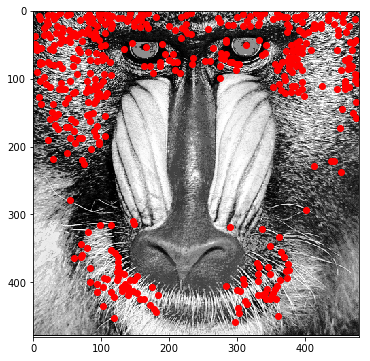

In [18]:
# Extract the points of interest
import numpy as np
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.exposure import equalize_hist

def show_corners(corners, image):
    fig = plt.figure()
    plt.gray()
    plt.imshow(image)
    y_corner, x_corner = zip(*corners)
    plt.plot(x_corner, y_corner, 'or')
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0], 0)
    fig.set_size_inches(np.array(fig.get_size_inches()) * 1.5)
    plt.show()

mandrill = io.imread('madrill.png')
mandrill = equalize_hist(rgb2gray(mandrill))
corners = corner_peaks(corner_harris(mandrill), min_distance=2)
show_corners(corners, mandrill)
    

The figure plots the extraced points of interest. Of the image's 230400
pixels, 466 were extracted as points of interest. This representation is much more
compact; ideally, there is enough variation proximal to the points of interest to
reproduce them despite changes in the image's illumination.

## Data Standardization

Many estimators perform better when they are trained on standardized data sets.
Standardized data has zero mean and unit variance. An explanatory variable with
zero mean is centered about the origin; its average value is zero. A feature vector
has unit variance when the variances of its features are all of the same order of
magnitude. For example, assume that a feature vector encodes two explanatory
variables. The first values of the first variable range from zero to one. The values of
the second explanatory variable range from zero to 100,000. The second feature must
be scaled to a range closer to {0,1} for the data to have unit variance. If a feature's
variance is orders of magnitude greater than the variances of the other features, that
feature may dominate the learning algorithm and prevent it from learning from the
other variables. Some learning algorithms also converge to the optimal parameter
values more slowly when data is not standardized. The value of an explanatory
variable can be standardized by subtracting the variable's mean and dividing the
difference by the variable's standard deviation. Data can be easily standardized
using scikit-learn's scale function:

In [19]:
from sklearn import preprocessing
import numpy as np
X = np.array([
            [0., 0., 5., 13., 9., 1.],
            [0., 0., 13., 15., 10., 15.],
            [0., 3., 15., 2., 0., 11.]
            ])
print preprocessing.scale(X)

[[ 0.         -0.70710678 -1.38873015  0.52489066  0.59299945 -1.35873244]
 [ 0.         -0.70710678  0.46291005  0.87481777  0.81537425  1.01904933]
 [ 0.          1.41421356  0.9258201  -1.39970842 -1.4083737   0.33968311]]
